In gradient descent, [momentum](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum) speeds up the convergence towards the minimum of the cost function by taking into account the previous weight change.

We can define velocity of the previous weight change as:

\begin{align}
\ v(t-1) = \triangle w(t-1)
\end{align}

We can update the weights as follows:

\begin{align}
\triangle w(t) = \mu v(t-1) - \eta \bigtriangledown J(t)
\end{align}

In code form:  
`v = dw  
dw = (momentum)*v - (learning rate)*(cost gradient)  
w += dw`

In [49]:
# Compare momentum with regular gradient descent
# For the class Data Science: Practical Deep Learning Concepts in Theano and TensorFlow
# https://deeplearningcourses.com/c/data-science-deep-learning-in-theano-tensorflow
# https://www.udemy.com/data-science-deep-learning-in-theano-tensorflow

# NOTE: MUST restrict initial values of W by dividing by #
# NOTE: sigmoid vs. rectifier for hiddens
# We get 15% error rate with sigmoid, 3% error rate with ReLU

import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import os
#os.chdir('ann_class2')
from util import get_normalized_data, error_rate, cost, y2indicator
from mlp import forward, derivative_w2, derivative_w1, derivative_b2, derivative_b1

In [50]:
max_iter = int(20) # make it 30 for sigmoid
print_period = 10

X, Y = get_normalized_data()
lr = 0.00004
reg = 0.01

Xtrain = X[:-1000,]
Ytrain = Y[:-1000]
Xtest  = X[-1000:,]
Ytest  = Y[-1000:]
Ytrain_ind = y2indicator(Ytrain)
Ytest_ind = y2indicator(Ytest)



Reading in and transforming data...


In [51]:
N, D = Xtrain.shape
batch_sz = 500
n_batches = int(N / batch_sz)

M = 300
K = 10
W1 = np.random.randn(D, M) / 28
b1 = np.zeros(M)
W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)

In [52]:
# compare 3 scenarios:
# 1. batch SGD
# 2. batch SGD with momentum
# 3. batch SGD with Nesterov momentum

# 1. batch
# cost = -16
LL_batch = []
CR_batch = []
for i in range(max_iter):
    Xtrain, Ytrain, Ytrain_ind = shuffle(Xtrain, Ytrain, Ytrain_ind)
    for j in range(n_batches):
        Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
        Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
        # print "first batch cost:", cost(pYbatch, Ybatch)

        # updates
        W2 -= lr*(derivative_w2(Z, Ybatch, pYbatch) + reg*W2)
        b2 -= lr*(derivative_b2(Ybatch, pYbatch) + reg*b2)
        W1 -= lr*(derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1)
        b1 -= lr*(derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1)

        if j % print_period == 0:
            # calculate just for LL
            pY, _ = forward(Xtest, W1, b1, W2, b2)
            # print "pY:", pY
            ll = cost(pY, Ytest_ind)
            LL_batch.append(ll)
            print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, ll))

            err = error_rate(pY, Ytest)
            CR_batch.append(err)
            print("Error rate:", err)

pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))

Cost at iteration i=0, j=0: 2402.588427
Error rate: 0.879
Cost at iteration i=0, j=10: 1833.672909
Error rate: 0.5
Cost at iteration i=0, j=20: 1475.451874
Error rate: 0.358
Cost at iteration i=0, j=30: 1233.587513
Error rate: 0.269
Cost at iteration i=0, j=40: 1068.666168
Error rate: 0.226
Cost at iteration i=0, j=50: 950.015681
Error rate: 0.205
Cost at iteration i=0, j=60: 858.657148
Error rate: 0.19
Cost at iteration i=0, j=70: 787.835925
Error rate: 0.171
Cost at iteration i=0, j=80: 730.052625
Error rate: 0.167
Cost at iteration i=1, j=0: 720.796121
Error rate: 0.166
Cost at iteration i=1, j=10: 675.901834
Error rate: 0.152
Cost at iteration i=1, j=20: 638.494126
Error rate: 0.144
Cost at iteration i=1, j=30: 607.988750
Error rate: 0.139
Cost at iteration i=1, j=40: 581.540761
Error rate: 0.132
Cost at iteration i=1, j=50: 557.890039
Error rate: 0.132
Cost at iteration i=1, j=60: 537.897989
Error rate: 0.132
Cost at iteration i=1, j=70: 520.042051
Error rate: 0.131
Cost at iterat

In [9]:
# 2. batch with momentum
W1 = np.random.randn(D, M) / 28
b1 = np.zeros(M)
W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)
LL_momentum = []
CR_momentum = []
mu = 0.9
dW2 = 0
db2 = 0
dW1 = 0
db1 = 0
for i in range(max_iter):
    for j in range(n_batches):
        Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
        Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)

        # updates
        dW2 = mu*dW2 - lr*(derivative_w2(Z, Ybatch, pYbatch) + reg*W2)
        W2 += dW2
        db2 = mu*db2 - lr*(derivative_b2(Ybatch, pYbatch) + reg*b2)
        b2 += db2
        dW1 = mu*dW1 - lr*(derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1)
        W1 += dW1
        db1 = mu*db1 - lr*(derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1)
        b1 += db1

        if j % print_period == 0:
            # calculate just for LL
            pY, _ = forward(Xtest, W1, b1, W2, b2)
            # print "pY:", pY
            ll = cost(pY, Ytest_ind)
            LL_momentum.append(ll)
            print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, ll))

            err = error_rate(pY, Ytest)
            CR_momentum.append(err)
            print("Error rate:", err)
pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))

Cost at iteration i=0, j=0: 2297.706041
Error rate: 0.836
Cost at iteration i=0, j=10: 902.931651
Error rate: 0.283
Cost at iteration i=0, j=20: 515.292555
Error rate: 0.163
Cost at iteration i=0, j=30: 413.993447
Error rate: 0.113
Cost at iteration i=0, j=40: 358.771417
Error rate: 0.102
Cost at iteration i=0, j=50: 325.560592
Error rate: 0.093
Cost at iteration i=0, j=60: 308.526979
Error rate: 0.084
Cost at iteration i=0, j=70: 295.477109
Error rate: 0.082
Cost at iteration i=0, j=80: 282.740673
Error rate: 0.087
Cost at iteration i=1, j=0: 280.620409
Error rate: 0.086
Cost at iteration i=1, j=10: 270.398246
Error rate: 0.077
Cost at iteration i=1, j=20: 262.062826
Error rate: 0.075
Cost at iteration i=1, j=30: 256.229862
Error rate: 0.074
Cost at iteration i=1, j=40: 247.428571
Error rate: 0.069
Cost at iteration i=1, j=50: 237.720741
Error rate: 0.066
Cost at iteration i=1, j=60: 233.250284
Error rate: 0.07
Cost at iteration i=1, j=70: 232.229058
Error rate: 0.068
Cost at iteratio

In [10]:
# 3. batch with Nesterov momentum
W1 = np.random.randn(D, M) / 28
b1 = np.zeros(M)
W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)
LL_nest = []
CR_nest = []
mu = 0.9
# alternate version uses dW
# dW2 = 0
# db2 = 0
# dW1 = 0
# db1 = 0
vW2 = 0
vb2 = 0
vW1 = 0
vb1 = 0
for i in range(max_iter):
    for j in range(n_batches):
        # because we want g(t) = grad(f(W(t-1) - lr*mu*dW(t-1)))
        # dW(t) = mu*dW(t-1) + g(t)
        # W(t) = W(t-1) - mu*dW(t)
        W1_tmp = W1 - lr*mu*vW1
        b1_tmp = b1 - lr*mu*vb1
        W2_tmp = W2 - lr*mu*vW2
        b2_tmp = b2 - lr*mu*vb2

        Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
        Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
        # pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
        pYbatch, Z = forward(Xbatch, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

        # updates
        # dW2 = mu*mu*dW2 - (1 + mu)*lr*(derivative_w2(Z, Ybatch, pYbatch) + reg*W2)
        # W2 += dW2
        # db2 = mu*mu*db2 - (1 + mu)*lr*(derivative_b2(Ybatch, pYbatch) + reg*b2)
        # b2 += db2
        # dW1 = mu*mu*dW1 - (1 + mu)*lr*(derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1)
        # W1 += dW1
        # db1 = mu*mu*db1 - (1 + mu)*lr*(derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1)
        # b1 += db1
        vW2 = mu*vW2 + derivative_w2(Z, Ybatch, pYbatch) + reg*W2_tmp
        W2 -= lr*vW2
        vb2 = mu*vb2 + derivative_b2(Ybatch, pYbatch) + reg*b2_tmp
        b2 -= lr*vb2
        vW1 = mu*vW1 + derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2_tmp) + reg*W1_tmp
        W1 -= lr*vW1
        vb1 = mu*vb1 + derivative_b1(Z, Ybatch, pYbatch, W2_tmp) + reg*b1_tmp
        b1 -= lr*vb1

        if j % print_period == 0:
            # calculate just for LL
            pY, _ = forward(Xtest, W1, b1, W2, b2)
            # print "pY:", pY
            ll = cost(pY, Ytest_ind)
            LL_nest.append(ll)
            print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, ll))

            err = error_rate(pY, Ytest)
            CR_nest.append(err)
            print("Error rate:", err)
pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))

Cost at iteration i=0, j=0: 2410.630728
Error rate: 0.915
Cost at iteration i=0, j=10: 916.825748
Error rate: 0.246
Cost at iteration i=0, j=20: 500.487787
Error rate: 0.149
Cost at iteration i=0, j=30: 398.085953
Error rate: 0.113
Cost at iteration i=0, j=40: 345.373968
Error rate: 0.102
Cost at iteration i=0, j=50: 317.046993
Error rate: 0.089
Cost at iteration i=0, j=60: 302.173025
Error rate: 0.085
Cost at iteration i=0, j=70: 286.298150
Error rate: 0.079
Cost at iteration i=0, j=80: 276.524401
Error rate: 0.076
Cost at iteration i=1, j=0: 275.206712
Error rate: 0.076
Cost at iteration i=1, j=10: 269.576805
Error rate: 0.075
Cost at iteration i=1, j=20: 258.988229
Error rate: 0.074
Cost at iteration i=1, j=30: 251.737791
Error rate: 0.07
Cost at iteration i=1, j=40: 243.220232
Error rate: 0.064
Cost at iteration i=1, j=50: 236.282927
Error rate: 0.062
Cost at iteration i=1, j=60: 232.728579
Error rate: 0.063
Cost at iteration i=1, j=70: 228.399898
Error rate: 0.058
Cost at iteratio

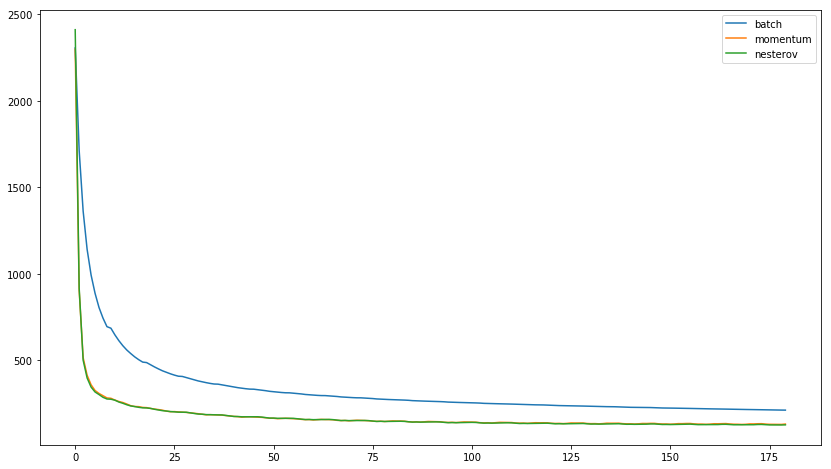

In [12]:
plt.figure(figsize = (14, 8))
plt.plot(LL_batch, label="batch")
plt.plot(LL_momentum, label="momentum")
plt.plot(LL_nest, label="nesterov")
plt.legend()
plt.show()